<a href="https://colab.research.google.com/github/tyslas/CS5265-tyslas-nfl-spread-line-outcomes/blob/main/NFLSpreadAndLineOutcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project to predict future NFL Spread & Line outcomes

## Author: Tito Yslas

### Background
I enjoy watching the NFL and playing fantasy football. I also like to place bets on games using apps like FanDuel. The purpose of this project is to increase my understanding of the NFL betting market and possibly create a machine learning model to give myself an edge next season.

### Project Description
I found a dataset from Kaggle titled [NFL scores and betting data](https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data?resource=download). This dataset has over 13,000 samples and 17 features. The goal is to use this dataset to train a model that will predict the winner of a given game.

### Performance Metric
For my performance metric, I will aim for the model to have at least 70% accuracy.

## Import Libraries

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

### Data Dictionary
- schedule_date: Date that the game took place. This column is a date in the format MM/DD/YYYY
- schedule_season: Year of the season began. NFL seasons start in the fall and end before the spring of the following year. So the 2023 season will refer to the years 2023-2024. This column is a number in the format YYYY
- schedule_week: Week of the NFL season. This column is either a number during regular season weeks or a string in playoff weeks. For the purposes of this project the playoff weeks will be converted to numbers and the schedule_playoff column will be used to determine whether the week is a playoff game or not
- schedule_playoff: This column is a boolean. FALSE is regular season and TRUE is playoffs
- team_home: Name of the home team. This column is a string
- score_home: Points scored by the home team. This column is a number
- score_away: Points scored by the away team. This column is a number
- winner: This column will be a feature derived from score_home and score_away columns to that will use one hot encoding - if team_home scores more points this will be a 1 - if team_home scores fewer points it will be a 0
- team_away: Name of the away team. This column is a string
- team_favorite_id: Acronym of the team that was determined most likely to win by the betting market. It is either two or three letters. For the purposes of this project this column will be changed to be either the team_home or team_away name
- team_home_favorite: this will represent the encoded team_favorite_id - if team_home is favored this column will be marked as a 1 - if it's a zero then we know that team_away is favored
- spread_favorite: The number of points that the favored team needs to win by for a bet placed on the spread of the favorite to win. This column will either be a negative number or zero
- over_under_line: The number of points that both teams combined need to score for a bet placed on the 'line' to win. This column is a positive number
- stadium: Name of the venue that the game is played
- stadium_neutral: This column is a boolean. FALSE is not a neutral venue and TRUE is a neutral venue - for the purposes of this project this column will be one hot encoded with a neutral venue being marked as a 1 and non-neutral marked as a 0
- weather_temperature: The temperature in Fahrenheit at the venue where the game is played. This column is a number
- weather_wind_mph: The speed of wind in miles per hour. This column is a number
- weather_humidity: The measurement of water vapor in the air during the game measured as a percentage. This column is a number
- weather_detail: Other information about the weather conditions - if the venue is indoor or the venue has a retractable roof. This column is a string


In [4]:
from google.colab import drive
drive.mount('/content/drive/')
# change directory to relevant files
%cd /content/drive/MyDrive/vandy/nfl
# print all file names in directory
for file in os.listdir():
  print(file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/vandy/nfl
data_dictionary.csv
spreadspoke_scores.csv


In [5]:
scores = pd.read_csv('spreadspoke_scores.csv')
display(scores.sample(2)) # prints o2 random rows
scores.info()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
8796,11/6/05,2005,9,False,Minnesota Vikings,27,14,Detroit Lions,DET,-1.5,37.5,Hubert H. Humphrey Metrodome,False,72.0,0.0,NaN,indoor
12686,9/13/20,2020,1,False,Los Angeles Rams,20,17,Dallas Cowboys,DAL,-2.0,51.5,SoFi Stadium,False,72.0,0.0,NaN,indoor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13516 non-null  object 
 1   schedule_season      13516 non-null  int64  
 2   schedule_week        13516 non-null  object 
 3   schedule_playoff     13516 non-null  bool   
 4   team_home            13516 non-null  object 
 5   score_home           13516 non-null  int64  
 6   score_away           13516 non-null  int64  
 7   team_away            13516 non-null  object 
 8   team_favorite_id     11037 non-null  object 
 9   spread_favorite      11037 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              13516 non-null  object 
 12  stadium_neutral      13516 non-null  bool   
 13  weather_temperature  12309 non-null  float64
 14  weather_wind_mph     12293 non-null  float64
 15  weather_humidity     8468 non-null  

## Exploratory Data Analysis
### Questions to answer with EDA:
1. Is there a relationship between team_home and the spread_favorite columns?
1. Is there a relationship between team_home and the over_under_line columns?
1. What features would make sense to introduce to improve the model's ability to correctly predict the winner?
1. Which columns, if any, should I remove from the training and test data so that the model can be effectively trained?
1. Which columns, if any, should I remove or insert derived data for in the case that there is a lot of missing data?

In [6]:
scores['team_home'].value_counts()

San Francisco 49ers         478
Dallas Cowboys              477
Pittsburgh Steelers         473
Green Bay Packers           467
Philadelphia Eagles         466
Minnesota Vikings           466
Denver Broncos              466
Miami Dolphins              464
Kansas City Chiefs          461
Buffalo Bills               457
Chicago Bears               455
New York Giants             454
Atlanta Falcons             449
New Orleans Saints          446
New York Jets               445
Detroit Lions               441
Cincinnati Bengals          437
New England Patriots        436
Washington Redskins         431
Cleveland Browns            425
San Diego Chargers          403
Seattle Seahawks            386
Tampa Bay Buccaneers        380
Oakland Raiders             335
Indianapolis Colts          326
Los Angeles Rams            286
Arizona Cardinals           238
Houston Oilers              236
Carolina Panthers           232
Jacksonville Jaguars        230
Baltimore Ravens            225
Tennesse

In [7]:
scores['team_favorite_id'].value_counts()

PIT     483
NE      477
SF      468
DAL     465
DEN     448
GB      438
PHI     419
MIN     399
KC      381
MIA     380
LAC     369
NO      369
SEA     368
BUF     355
LAR     354
NYG     344
LVR     341
TEN     340
IND     335
WAS     334
CHI     326
ATL     316
NYJ     294
TB      292
CIN     291
BAL     267
DET     249
CLE     241
ARI     237
CAR     210
JAX     174
PICK    143
HOU     130
Name: team_favorite_id, dtype: int64

In [8]:
scores.isna().sum() # number of missing values for each column

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1207
weather_wind_mph        1223
weather_humidity        5048
weather_detail         10597
dtype: int64

-3.0     1698
-3.5      866
-7.0      791
-2.5      723
-4.0      612
-6.0      603
-1.0      552
-6.5      549
-2.0      488
-4.5      381
-5.5      372
-7.5      345
-1.5      341
-5.0      332
-10.0     320
-9.0      265
-8.0      244
-9.5      206
-8.5      181
-10.5     167
 0.0      143
-11.0     131
-13.0     113
-13.5     111
-14.0     104
-12.0      73
-11.5      65
-12.5      58
-14.5      57
-17.0      27
-15.0      24
-16.0      22
-16.5      20
-15.5      18
-18.0       9
-17.5       6
-20.0       4
-19.0       3
-18.5       3
-19.5       2
-20.5       2
-24.0       1
-24.5       1
-22.5       1
-26.5       1
-21.5       1
-21.0       1
Name: spread_favorite, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4829e29900>,
 [Text(0.9740016190143815, 0.5111955067851864, '-3.0'),
  Text(0.3850838749683735, 1.0303933274431383, '-3.5'),
  Text(-0.125127624099792, 1.0928600448763517, '-7.0'),
  Text(-0.5702100252513914, 0.9406702541819889, '-2.5'),
  Text(-0.8784457028983326, 0.6620673281921218, '-4.0'),
  Text(-1.0508660703866688, 0.32508537664755244, '-6.0'),
  Text(-1.0995454573558443, -0.03161941188775701, '-1.0'),
  Text(-1.0362428716756151, -0.3690538048868687, '-6.5'),
  Text(-0.8840671051039715, -0.6545420946532651, '-2.0'),
  Text(-0.6969018403579469, -0.851074511958681, '-4.5'),
  Text(-0.49993344669375495, -0.9798298571062747, '-5.5'),
  Text(-0.2909714870023945, -1.060818360395226, '-7.5'),
  Text(-0.07961579012006258, -1.0971150012480726, '-1.5'),
  Text(0.13072524699818713, -1.092204609859006, '-5.0'),
  Text(0.33001734337109834, -1.0493276671632568, '-10.0'),
  Text(0.49937563131953827, -0.9801142682586622, '-9.0'),
  Text(0.635648949706906, -0.89

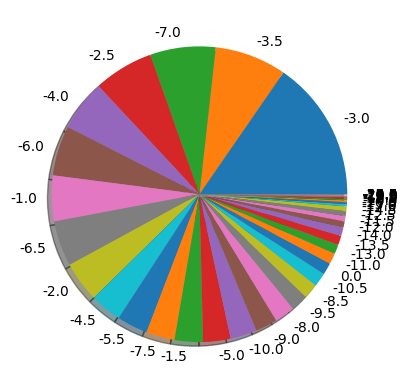

In [11]:
# create a pie chart to visualize spread favorite points
spread = scores['spread_favorite'].value_counts()
display(spread)

plt.pie(spread, labels=spread.index, shadow = True)

<Axes: >

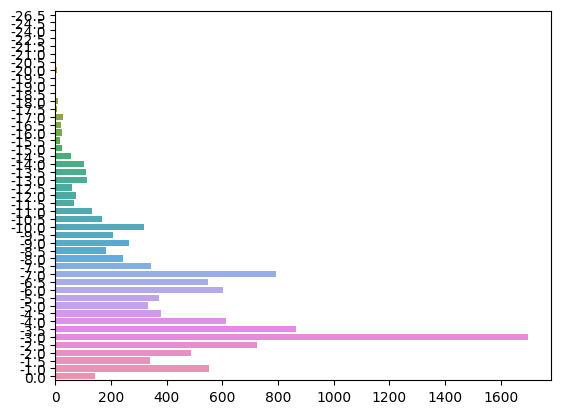

In [12]:
# create a bar chart to visualize the same spread favorite points
sns.barplot(y=spread.index, x=spread.values, orient='h')

In [15]:
scores.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,13516.000000,13516.000000,13516.000000,11037.000000,12309.000000,12293.000000,8468.000000
mean,1996.082939,22.461897,19.784848,-5.385204,58.833211,7.689010,67.212801
std,16.144258,10.526423,10.165222,3.439617,15.538656,5.694124,15.796414
min,1966.000000,0.000000,0.000000,-26.500000,-6.000000,0.000000,4.000000
25%,1983.000000,15.000000,13.000000,-7.000000,48.000000,3.000000,57.000000
50%,1997.000000,22.000000,20.000000,-4.500000,62.000000,8.000000,69.000000
75%,2010.000000,29.000000,27.000000,-3.000000,72.000000,11.000000,79.000000
max,2022.000000,72.000000,62.000000,0.000000,97.000000,40.000000,100.000000


<Axes: xlabel='team_favorite_id', ylabel='spread_favorite'>

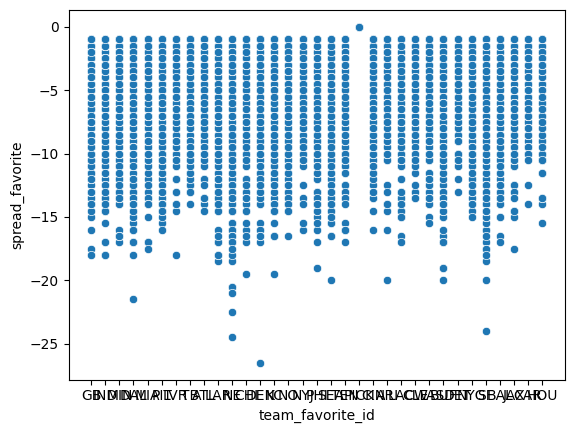

In [17]:
# visualize relationships that may exist between team_home and spread_favorite
sns.scatterplot(x=scores['team_favorite_id'], y=scores['spread_favorite'])